In [1]:
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import stats
import seaborn as sns

In [3]:
df_sg = pd.read_csv("/home/julia/data/gradients/atlas/interneurons/supragranular_regions.csv")
df_ig = pd.read_csv("/home/julia/data/gradients/atlas/interneurons/infragranular_regions.csv")

In [5]:
df_sg.head()

,Unnamed: 0,ROI,PV avg,SST avg,VIP avg,id,g0,g1,g2,g3,g4,g5,PV/SST,cluster
0,0,FRP2/3,316,393,484,667.0,-0.006705,0.019813,-0.005067,0.003184,0.010318,-0.008194,0.445698,prefrontal
1,1,MOp2/3,15358,13602,15778,943.0,-0.043036,-0.018165,0.014954,-0.009247,0.003744,0.008389,0.530318,motor
2,2,MOs2/3,10832,11053,12701,962.0,0.000832,-0.006248,0.008644,-0.009098,0.016700,0.006267,0.494951,motor
3,4,SSp-n2/3,2507,1411,1857,838.0,-0.048930,0.017112,0.019568,0.029283,-0.017675,-0.006263,0.639867,somatosensory
4,5,SSp-bfd2/3,13107,8583,12645,201.0,0.029488,0.007799,0.029171,0.033124,-0.006199,-0.009223,0.604288,somatosensory


In [6]:
df_sg_ig = df_sg.drop(columns=['Unnamed: 0'])

In [10]:
df_sg_ig["PV avg"] = df_sg["PV avg"] / df_ig["PV avg"]
df_sg_ig["SST avg"] = df_sg["SST avg"] / df_ig["SST avg"]
df_sg_ig["VIP avg"] = df_sg["VIP avg"] / df_ig["VIP avg"]
df_sg_ig["PV/SST"] = df_sg["PV/SST"] / df_ig["PV/SST"]

In [15]:
for g in range(6):
    for c in ['PV avg', 'SST avg', 'VIP avg', 'PV/SST']:
        r = stats.spearmanr(df_sg_ig['g%i' %g], df_sg_ig[c])
        if r[1]<0.1:
            print('Gradient %i, %s:' %(g,c), r)

Gradient 2, PV/SST: SpearmanrResult(correlation=0.36061776061776063, pvalue=0.030723499322388742)
Gradient 4, SST avg: SpearmanrResult(correlation=0.35186615186615189, pvalue=0.035333518206069628)
Gradient 4, PV/SST: SpearmanrResult(correlation=-0.29806949806949806, pvalue=0.077448943334139084)


In [17]:
df_sg_ig.loc[df_sg_ig['ROI']=='MOp5', 'cluster'] = 'motor'
df_sg_ig.loc[df_sg_ig['ROI']=='MOs5', 'cluster'] = 'motor'
df_sg_ig.loc[df_sg_ig['ROI']=='MOp6a', 'cluster'] = 'motor'
df_sg_ig.loc[df_sg_ig['ROI']=='MOs6a', 'cluster'] = 'motor'
df_sg_ig.loc[df_sg_ig['cluster']=='somatomotor', 'cluster'] = 'somatosensory'

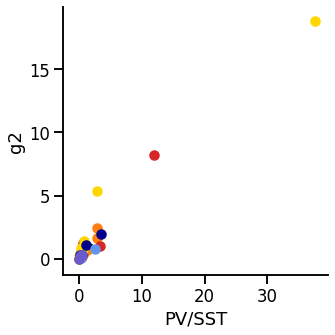

In [22]:
clusters = ['motor', 'somatosensory', 'prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['darkgreen', 'tab:orange', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']
sns.set_context('talk')
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df_sg_ig.loc[df_sg_ig['cluster']==clusters[c], "ROI"])
    for r in regions:
        plt.scatter(df_sg_ig.loc[df_sg_ig['ROI']==r, 'PV avg'].values[0], 
                    df_sg_ig.loc[df_sg_ig['ROI']==r, 'SST avg'].values[0], 
                    color=colors[c], label=clusters[c])
plt.xlabel('PV/SST')
plt.ylabel('g2')
plt.tight_layout()
sns.despine()